**Data Description**

You are provided with daily historical sales data. The task is to forecast the total amount of products sold in every shop for the test set. Note that the list of shops and products slightly changes every month. Creating a robust model that can handle such situations is part of the challenge.

**File descriptions**

sales_train.csv - the training set. Daily historical data from January 2013 to October 2015.

test.csv - the test set. You need to forecast the sales for these shops and products for November 2015.

sample_submission.csv - a sample submission file in the correct format.

items.csv - supplemental information about the items/products.

item_categories.csv  - supplemental information about the items categories.

shops.csv- supplemental information about the shops.

Data fields

ID - an Id that represents a (Shop, Item) tuple within the test set

shop_id - unique identifier of a shop

item_id - unique identifier of a product

item_category_id - unique identifier of item category

item_cnt_day - number of products sold. You are predicting a monthly amount of this measure

item_price - current price of an item

date - date in format dd/mm/yyyy

date_block_num - a consecutive month number, used for convenience. January 2013 is 0, February 2013 is 1,..., October 2015 is 33

item_name - name of item

shop_name - name of shop

item_category_name - name of item category

This dataset is permitted to be used for any purpose, including commercial use.

In [16]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
category = pd.read_csv('item_categories.csv')
item = pd.read_csv('items.csv')
sales = pd.read_csv('sales_train.csv')
sample = pd.read_csv('sample_submission.csv')
shop = pd.read_csv('shops.csv')
test = pd.read_csv('test.csv')
sales_train = pd.read_csv('sales_train.csv',index_col='date',parse_dates=True)

In [3]:
sales_train

,date_block_num,shop_id,item_id,item_price,item_cnt_day
date,,,,,
2013-02-01,0.0,59.0,22154.0,999.00,1.0
2013-03-01,0.0,25.0,2552.0,899.00,1.0
2013-05-01,0.0,25.0,2552.0,899.00,-1.0
2013-06-01,0.0,25.0,2554.0,1709.05,1.0
2013-01-15,0.0,25.0,2555.0,1099.00,1.0
...,...,...,...,...,...
2013-01-27,0.0,51.0,13991.0,161.00,1.0
2013-08-01,0.0,51.0,14016.0,161.00,1.0
2013-01-24,0.0,51.0,14014.0,161.00,1.0


In [4]:
print("shape info of sales_train: {}".format(sales_train.shape))
print("shape info of test: {}".format(test.shape))
print("shape info of sample submission {}".format(sample.shape))
print("shape info of items {}".format(item.shape))
print("shape info of items category {}".format(category.shape))
print("shape info of shops {}".format(shop.shape))

shape info of sales_train: (100083, 5)
shape info of test: (214200, 3)
shape info of sample submission (214200, 2)
shape info of items (22170, 3)
shape info of items category (84, 2)
shape info of shops (60, 2)


In [5]:
print(sales_train.head())
print('\n')
print(test.head())
print('\n')
print(item.head())
print('\n')
print(category.head())
print('\n')
print(shop.head())
print('\n')

            date_block_num  shop_id  item_id  item_price  item_cnt_day
date                                                                  
2013-02-01             0.0     59.0  22154.0      999.00           1.0
2013-03-01             0.0     25.0   2552.0      899.00           1.0
2013-05-01             0.0     25.0   2552.0      899.00          -1.0
2013-06-01             0.0     25.0   2554.0     1709.05           1.0
2013-01-15             0.0     25.0   2555.0     1099.00           1.0


   ID  shop_id  item_id
0   0        5     5037
1   1        5     5320
2   2        5     5233
3   3        5     5232
4   4        5     5268


                                           item_name  item_id  \
0          ! ВО ВЛАСТИ НАВАЖДЕНИЯ (ПЛАСТ.)         D        0   
1  !ABBYY FineReader 12 Professional Edition Full...        1   
2      ***В ЛУЧАХ СЛАВЫ   (UNV)                    D        2   
3    ***ГОЛУБАЯ ВОЛНА  (Univ)                      D        3   
4        ***КОРОБКА (СТЕКЛО)  

In [6]:
print(sales_train.isna().sum())
print('\n')
print(test.isna().sum())
print('\n')
print(item.isna().sum())
print('\n')
print(category.isna().sum())
print('\n')
print(shop.isna().sum())
print('\n')

date_block_num    1
shop_id           1
item_id           1
item_price        1
item_cnt_day      1
dtype: int64


ID         0
shop_id    0
item_id    0
dtype: int64


item_name           0
item_id             0
item_category_id    0
dtype: int64


item_category_name    0
item_category_id      0
dtype: int64


shop_name    0
shop_id      0
dtype: int64




In [7]:
items_merged=pd.merge(item,category,on='item_category_id')
items_merged

,item_name,item_id,item_category_id,item_category_name
0,! ВО ВЛАСТИ НАВАЖДЕНИЯ (ПЛАСТ.) D,0,40,Кино - DVD
1,***В ЛУЧАХ СЛАВЫ (UNV) D,2,40,Кино - DVD
2,***ГОЛУБАЯ ВОЛНА (Univ) D,3,40,Кино - DVD
3,***КОРОБКА (СТЕКЛО) D,4,40,Кино - DVD
4,***НОВЫЕ АМЕРИКАНСКИЕ ГРАФФИТИ (UNI) ...,5,40,Кино - DVD
...,...,...,...,...
22165,Элемент питания GP 15AU (LR6) - Блистер 2 шт U...,22095,83,Элементы питания
22166,Элемент питания GP 24A (LR03) - Блистер 2 шт,22096,83,Элементы питания
22167,Элемент питания GP 24AU (LR03) - Блистер 2 шт ...,22097,83,Элементы питания
22168,Элемент питания КОСМОС LR03 2*BL,22098,83,Элементы питания


In [8]:
sales_train_merged=pd.merge(sales_train,shop,on='shop_id')
sales_train_merged=pd.merge(sales_train_merged,items_merged,on='item_id')
sales_train_merged

,date_block_num,shop_id,item_id,item_price,item_cnt_day,shop_name,item_name,item_category_id,item_category_name
0,0.0,59.0,22154.0,999.0,1.0,"Ярославль ТЦ ""Альтаир""",ЯВЛЕНИЕ 2012 (BD),37,Кино - Blu-Ray
1,0.0,25.0,22154.0,999.0,1.0,"Москва ТРК ""Атриум""",ЯВЛЕНИЕ 2012 (BD),37,Кино - Blu-Ray
2,0.0,25.0,22154.0,999.0,1.0,"Москва ТРК ""Атриум""",ЯВЛЕНИЕ 2012 (BD),37,Кино - Blu-Ray
3,0.0,25.0,22154.0,999.0,1.0,"Москва ТРК ""Атриум""",ЯВЛЕНИЕ 2012 (BD),37,Кино - Blu-Ray
4,0.0,25.0,22154.0,999.0,1.0,"Москва ТРК ""Атриум""",ЯВЛЕНИЕ 2012 (BD),37,Кино - Blu-Ray
...,...,...,...,...,...,...,...,...,...
100077,0.0,52.0,20282.0,58.0,1.0,"Уфа ТК ""Центральный""",ФИРМА,40,Кино - DVD
100078,0.0,51.0,19676.0,321.0,1.0,"Тюмень ТЦ ""Зеленый Берег""",ТИТАНИК (Кармен) (BD),37,Кино - Blu-Ray
100079,0.0,51.0,20318.0,93.0,1.0,"Тюмень ТЦ ""Зеленый Берег""",ФРЕНКИ И ДЖОННИ,40,Кино - DVD
100080,0.0,51.0,1667.0,190.0,1.0,"Тюмень ТЦ ""Зеленый Берег""",BENSON GEORGE Guitar Man,55,Музыка - CD локального производства


In [9]:
print(sales_train_merged.isna().sum())
print('\n')
print(items_merged.isna().sum())

date_block_num        0
shop_id               0
item_id               0
item_price            0
item_cnt_day          0
shop_name             0
item_name             0
item_category_id      0
item_category_name    0
dtype: int64


item_name             0
item_id               0
item_category_id      0
item_category_name    0
dtype: int64


In [10]:
sales_train.dtypes

date_block_num    float64
shop_id           float64
item_id           float64
item_price        float64
item_cnt_day      float64
dtype: object

In [11]:
sales_train[['item_price','item_cnt_day']].describe()

,item_price,item_cnt_day
count,100082.000000,100082.000000
mean,705.736641,1.141764
std,1233.001920,0.693669
min,9.000000,-6.000000
25%,199.000000,1.000000
50%,398.000000,1.000000
75%,699.000000,1.000000
max,32990.000000,64.000000


#### Data visualization

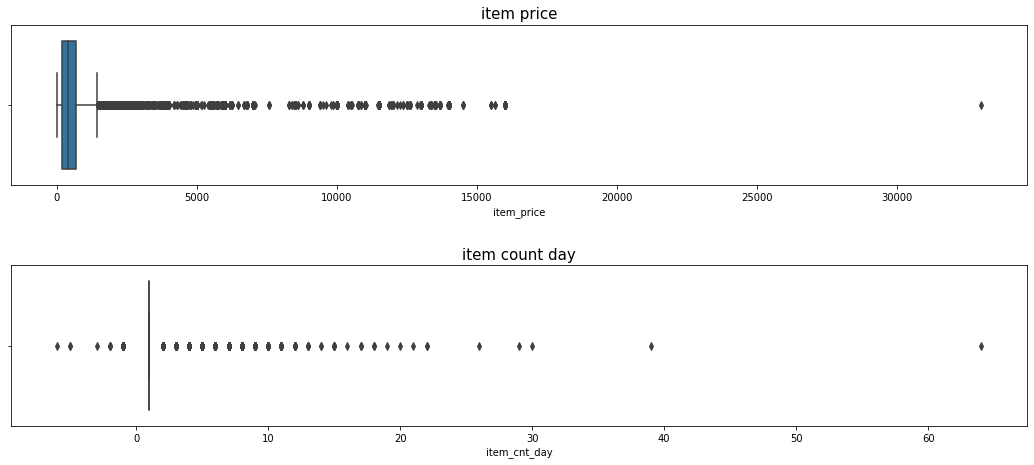

In [17]:
figure2=plt.figure(2,figsize=(15,10))
plt.subplot(3,1,1)
plt.title("item price",size=15)
sns.boxplot(data=sales_train,x="item_price")
plt.subplot(3,1,2)
plt.title("item count day",size=15)
sns.boxplot(data=sales_train,x="item_cnt_day")
figure2.tight_layout(pad=3.0)
plt.show()

In [18]:
print("item price median {:.2f} item price mean : {:.2f}".format(sales_train['item_price'].median(),sales_train['item_price'].mean()))
print("item count day median: {:.2f} item count day mean {:.2f} ".format(sales_train['item_cnt_day'].median(),sales_train['item_cnt_day'].mean()))

item price median 398.00 item price mean : 705.74
item count day median: 1.00 item count day mean 1.14 


In [19]:
print(len(sales_train_merged['item_category_name'].unique()))

55


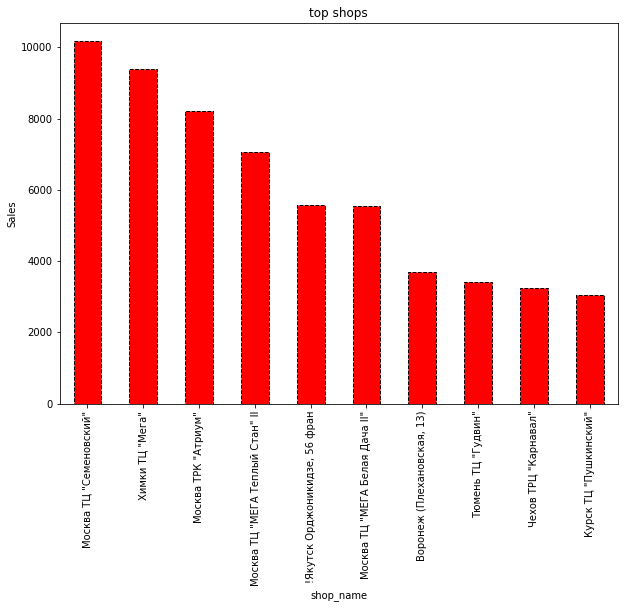

In [20]:
top10s=plt.figure(figsize=(10,7))
plt.title('top shops')
plt.ylabel('Sales')
sales_train_merged.groupby('shop_name')['item_cnt_day'].sum().sort_values(ascending=False)[0:10].plot(kind='bar',color='Red',ls='dashed',edgecolor='Black')
plt.show()

<Figure size 1080x504 with 0 Axes>

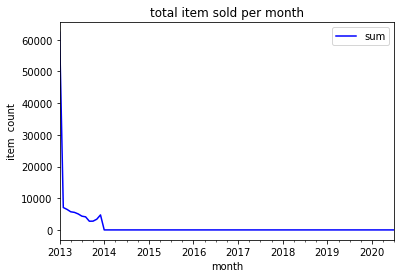

In [21]:
plt.figure(figsize=(15,7))

sales_train['item_cnt_day'].resample('M').agg(['sum']).plot(color='blue',ls='-')
plt.title('total item sold per month')
plt.xlabel('month',size=10)
plt.ylabel('item  count',size=10)
plt.show()

In [22]:
sales_train['item_cnt_day']

date
2013-02-01    1.0
2013-03-01    1.0
2013-05-01   -1.0
2013-06-01    1.0
2013-01-15    1.0
             ... 
2013-01-27    1.0
2013-08-01    1.0
2013-01-24    1.0
2013-01-13    1.0
2020-07-01    NaN
Name: item_cnt_day, Length: 100083, dtype: float64

<Figure size 1080x504 with 0 Axes>

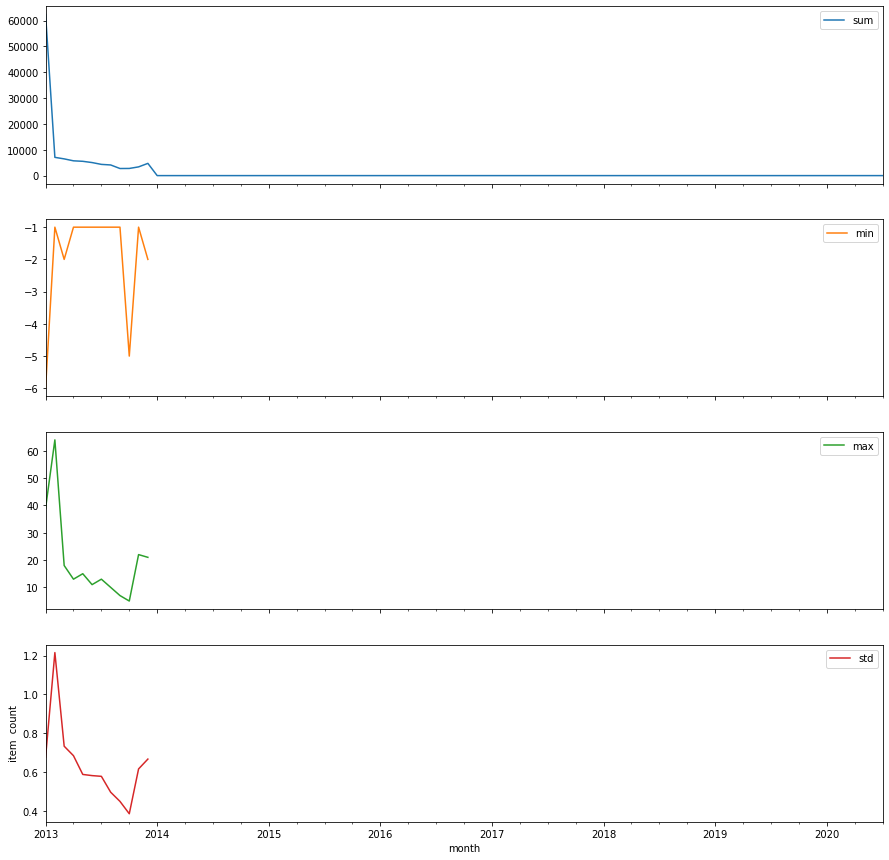

In [23]:
plt.figure(figsize=(15,7))
sales_train['item_cnt_day'].resample('M').agg(['sum','min','max','std']).plot(subplots=True,figsize=(15,15))
plt.xlabel('month',size=10)
plt.ylabel('item  count',size=10)
plt.show()

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


<Figure size 1440x504 with 0 Axes>

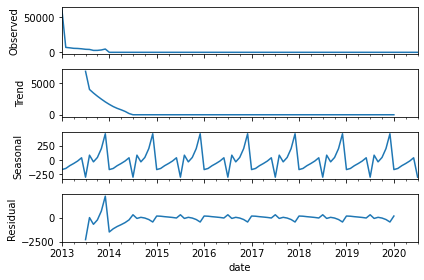

In [24]:
import statsmodels.api as sm

decomposition=sm.tsa.seasonal_decompose(sales_train['item_cnt_day'].resample('M').agg(['sum']),model='additive')

figure=plt.figure(figsize=(20,7))
decomposition.plot()
plt.show()

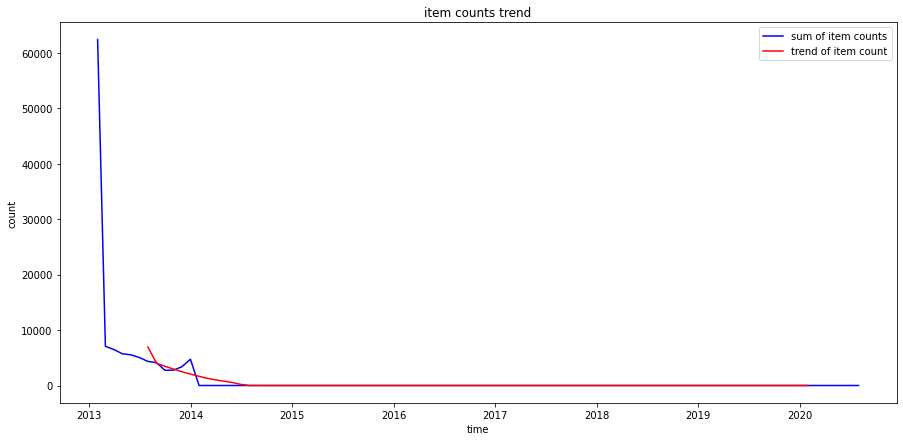

In [25]:
figtrend=plt.figure(figsize=(15,7))
plt.title("item counts trend")
plt.plot(sales_train['item_cnt_day'].resample('M').sum(),c='blue')
plt.plot(decomposition.trend.index, decomposition.trend, c='red')
plt.legend(["sum of item counts","trend of item count"])
plt.xlabel('time')
plt.ylabel('count')
plt.show()

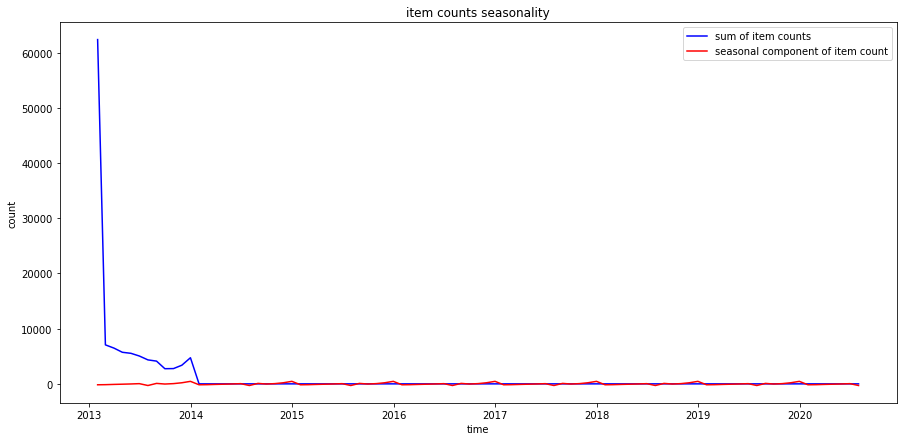

In [26]:
figseason=plt.figure(figsize=(15,7))
plt.title("item counts seasonality")
plt.plot(sales_train['item_cnt_day'].resample('M').sum(),c='blue')
plt.plot(decomposition.seasonal.index, decomposition.seasonal, c='red')
plt.legend(["sum of item counts","seasonal component of item count"])
plt.xlabel('time')
plt.ylabel('count')
plt.show()

#### Holt Winter Algorithm

In [27]:
from statsmodels.tsa.holtwinters import Holt
from statsmodels.tsa.holtwinters import ExponentialSmoothing

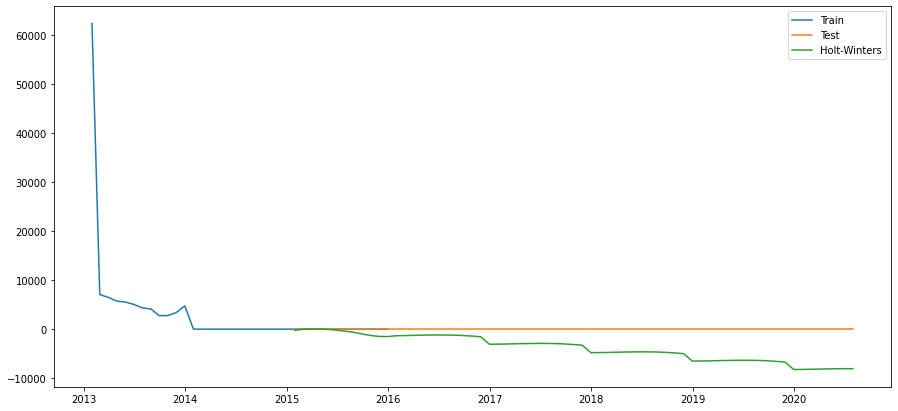

In [29]:
X=sales_train['item_cnt_day'].resample('M').sum()
train=X['2013':'2015']
test=X['2015':]

model = ExponentialSmoothing(train, trend='add',seasonal='add').fit()
pred = model.predict(start=test.index[0], end=test.index[-1])

predfig=plt.figure(figsize=(15,7))
plt.plot(train.index, train, label='Train')
plt.plot(test.index, test, label='Test')
plt.plot(pred.index, pred, label='Holt-Winters')
plt.legend(loc='best')
plt.show()